<a href="https://colab.research.google.com/github/Matheus-SF/churn_case/blob/main/Notebooks/churn_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdução

Nos últimos 3 anos, diversas tendências com resultados negativos têm se popularizado entre jovens da geração Z e Millenial, termos como "Quiet Quitting" , "Rage Applying" e "Revenge Quitting" descrevem um comportamento silencioso de revolta relacionados a desconexão emocional e motivacional com o trabalho, esgotamento, falta de reconhecimento ou baixa qualidade de vida, por exemplo:

---

## 1. Quiet Quitting

Ocorre quando profissionais deixam de se engajar além do mínimo necessário, cumprindo apenas as responsabilidades básicas do cargo sem assumir tarefas extras ou demonstrar envolvimento adicional.

## 2. Revenge Quitting

Ocorre quando funcionários se demitem impulsivamente de uma empresa motivados por frustrações ou ressentimento acumulado dentro do ambiente de trabalho.

## 3. Rage Applying

Define funcionários que buscam novas oportunidades de emprego não por estarem pragmaticamente buscando novas oportunidades, mas por estarem frustrados com o atual ambiente de trabalho.

---

Eventualmente, todas esses termos convergem para o mesmo ponto: desligamentos abruptos do ambiente de trabalho, causando queda de produtividade, desmotivação em cadeia e reputação negativa da empresa. Uma empresa que investe anos de recurso capacitando um profissional por exemplo, pode se deparar no dia seguinte com a perda de um talento estratégico que poderia ter sido evitado.

Assim, esse projeto tem por objetivo avaliar uma base de dados de uma pesquisa realizada com funcionários, visando obter insights sobre a satisfação de profissionais e ambiente de trabalho de diferentes áreas e evitar os comportamentos acima citados, além disso, criar um modelo capaz de prever a probabilidade de um funcionário se demitir abruptamente.




## Base de dados

https://www.kaggle.com/datasets/lainguyn123/employee-survey/data

A base é composta por 3025 dados distribuidos em 23 colunas

## Dicionário

| Variável                | Tipo      | Descrição                                                               |
| ----------------------- | --------- | ----------------------------------------------------------------------- |
| `EmpID`                 | `int64`   | Identificador único do funcionário                                      |
| `Gender`                | `object`  | Gênero do funcionário (Ex: Masculino, Feminino, Outro)                  |
| `Age`                   | `int64`   | Idade do funcionário                                                    |
| `MaritalStatus`         | `object`  | Estado civil (Ex: Solteiro, Casado, Divorciado)                         |
| `JobLevel`              | `object`  | Nível do cargo (Ex: Júnior, Pleno, Sênior)                              |
| `Experience`            | `int64`   | Anos de experiência total do funcionário                                |
| `Dept`                  | `object`  | Departamento onde o funcionário trabalha (Ex: TI, RH, Vendas)           |
| `EmpType`               | `object`  | Tipo de vínculo empregatício (Ex: Tempo integral, Estagiário, Contrato) |
| `WLB`                   | `int64`   | Work-Life Balance (Equilíbrio entre vida pessoal e trabalho) — escala   |
| `WorkEnv`               | `int64`   | Avaliação do ambiente de trabalho — escala                              |
| `PhysicalActivityHours` | `float64` | Horas semanais de atividade física praticadas                           |
| `Workload`              | `int64`   | Nível de carga de trabalho percebido — escala                           |
| `Stress`                | `int64`   | Nível de estresse percebido — escala                                    |
| `SleepHours`            | `float64` | Número médio de horas de sono por dia                                   |
| `CommuteMode`           | `object`  | Meio de transporte utilizado para ir ao trabalho (Ex: carro, metrô)     |
| `CommuteDistance`       | `int64`   | Distância de deslocamento                          |
| `NumCompanies`          | `int64`   | Número de empresas anteriores em que o funcionário trabalhou            |
| `TeamSize`              | `int64`   | Número de colegas na equipe atual                                       |
| `NumReports`            | `int64`   | Número de pessoas que se reportam diretamente ao funcionário            |
| `EduLevel`              | `object`  | Nível educacional (Ex: Ensino Médio, Graduação, Pós)                    |
| `haveOT`                | `bool`    | Indica se o funcionário faz horas extras (Overtime)                     |
| `TrainingHoursPerYear`  | `float64` | Horas de treinamento realizadas por ano                                 |
| `JobSatisfaction`       | `int64`   | Satisfação no trabalho — escala
|


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [4]:
base = pd.read_csv('/content/employee_survey.csv')

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

In [7]:
base.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


Podemos observar que a base não possui valores nulos.



##EDA

In [8]:
print(base['JobSatisfaction'].value_counts())

JobSatisfaction
4    1249
3     566
5     516
1     417
2     277
Name: count, dtype: int64


<ipython-input-10-4273919302>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x='JobSatisfaction', palette = "Purples")


<Axes: xlabel='JobSatisfaction', ylabel='count'>

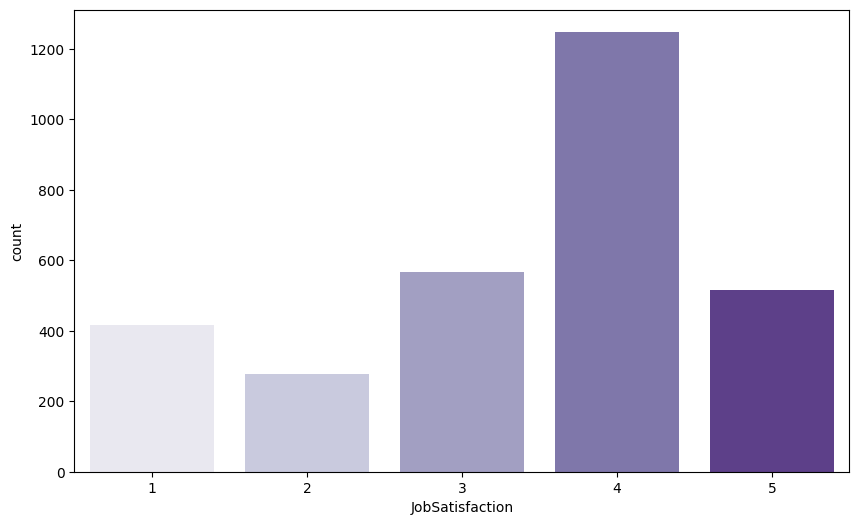

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=base, x='JobSatisfaction', palette = "Purples")

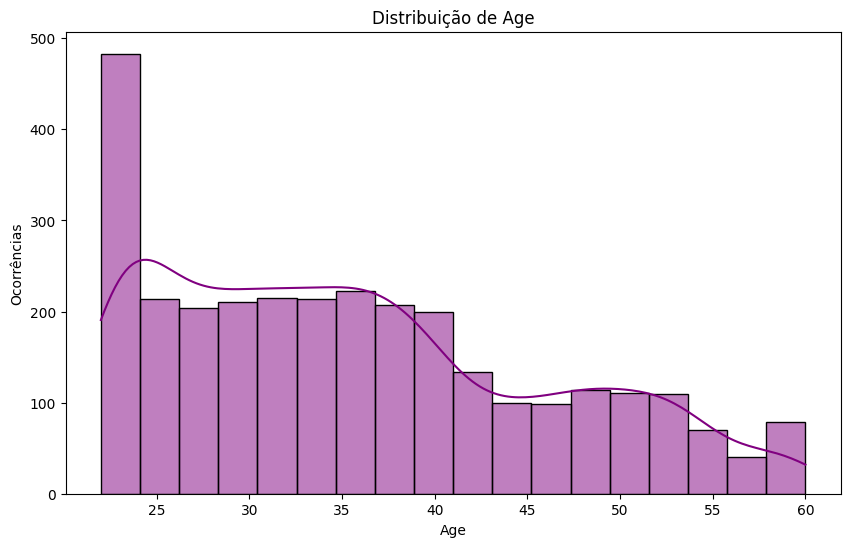

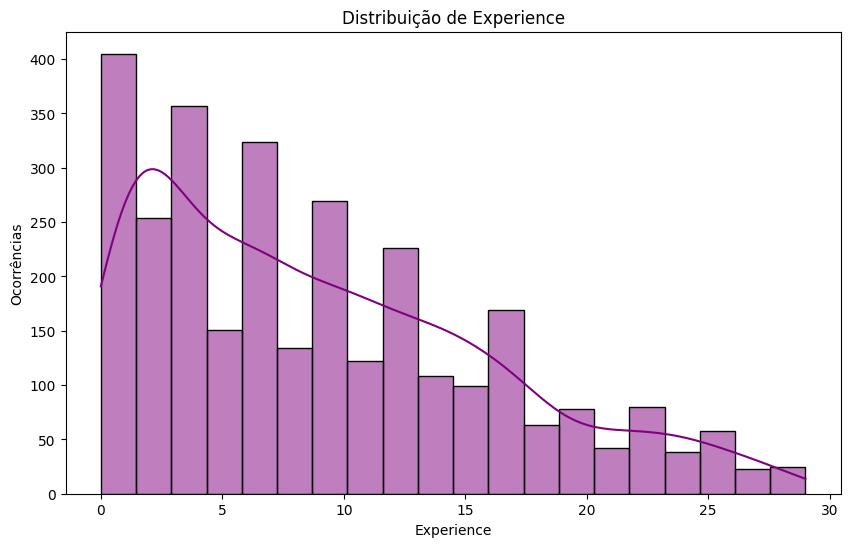

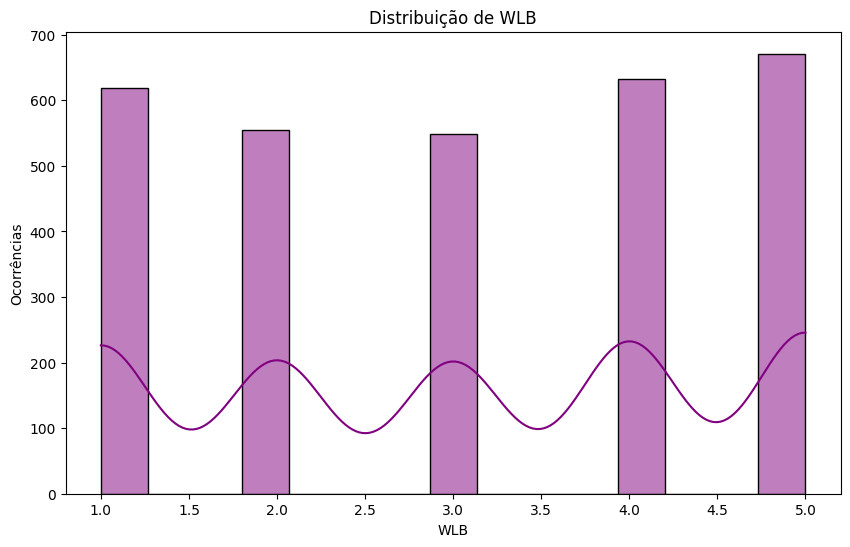

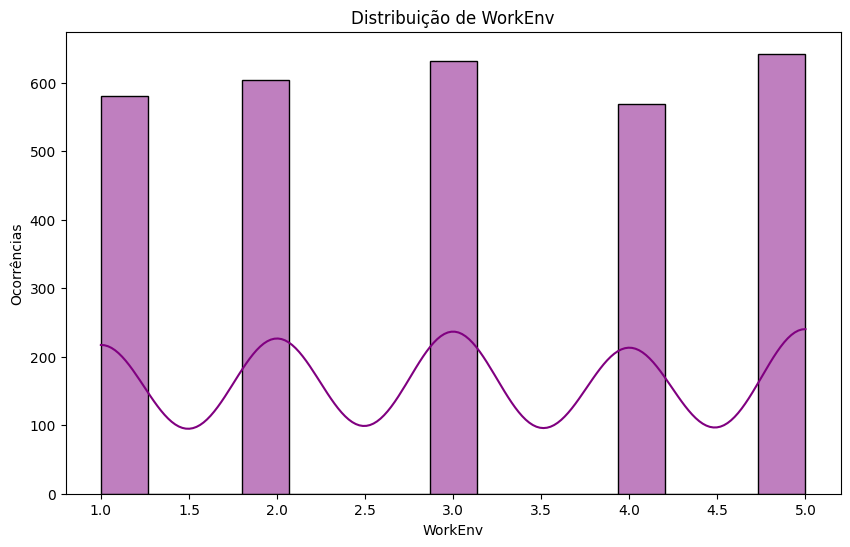

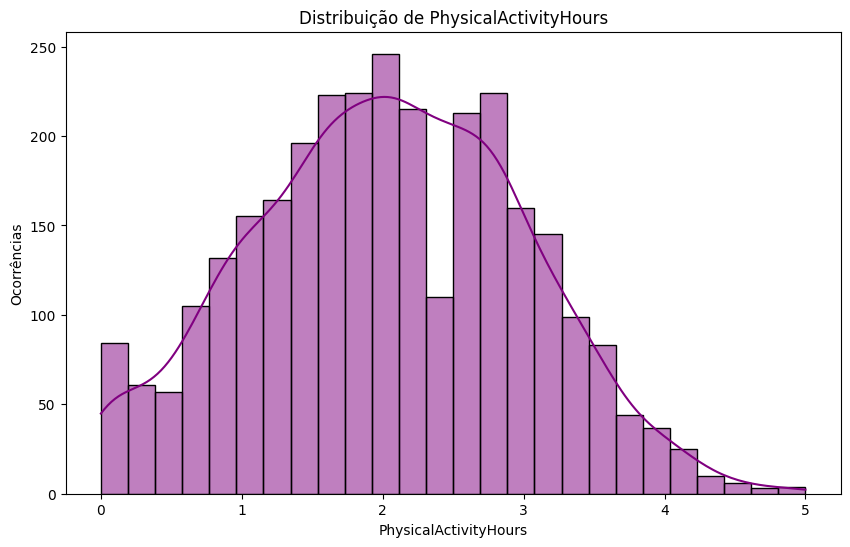

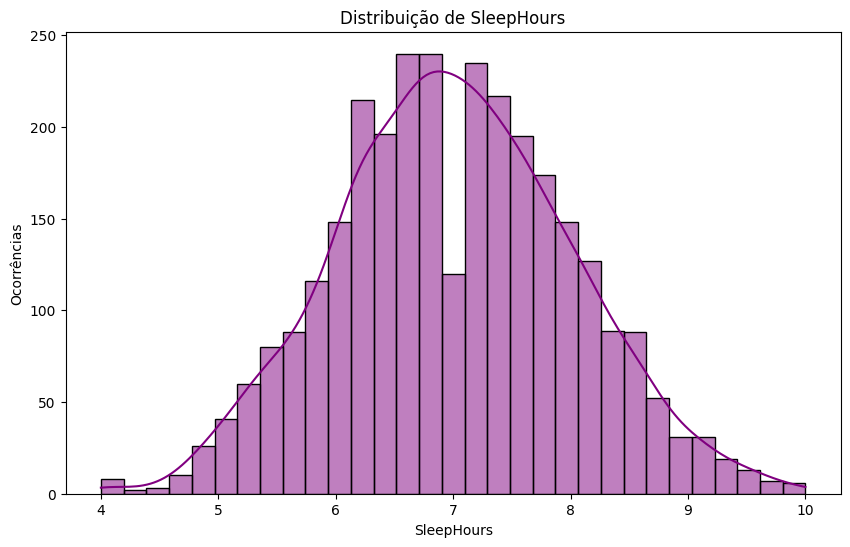

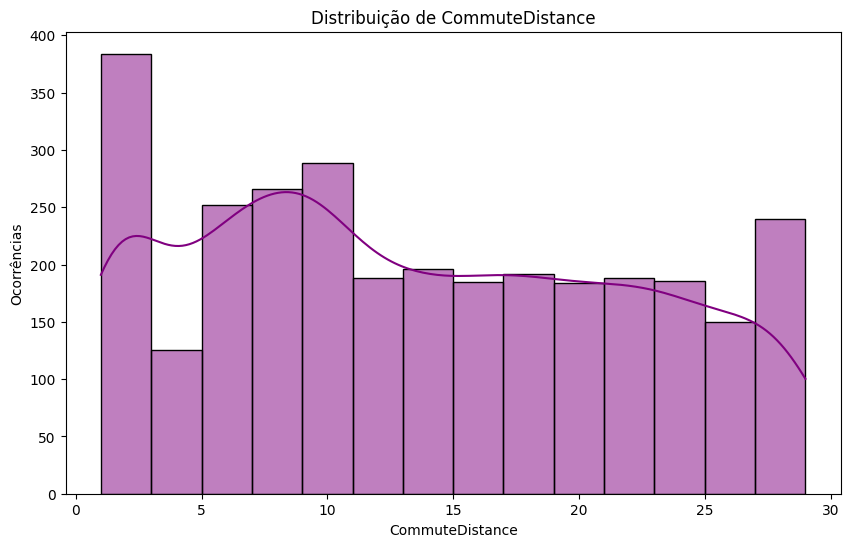

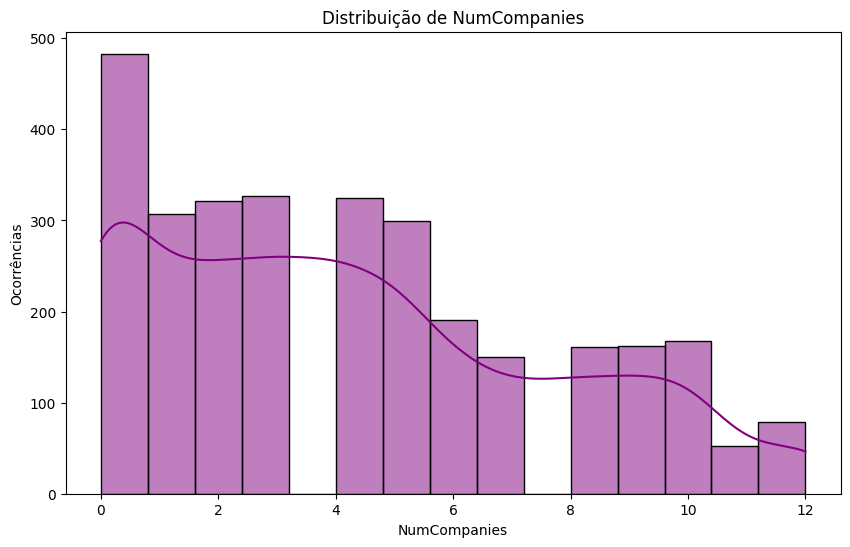

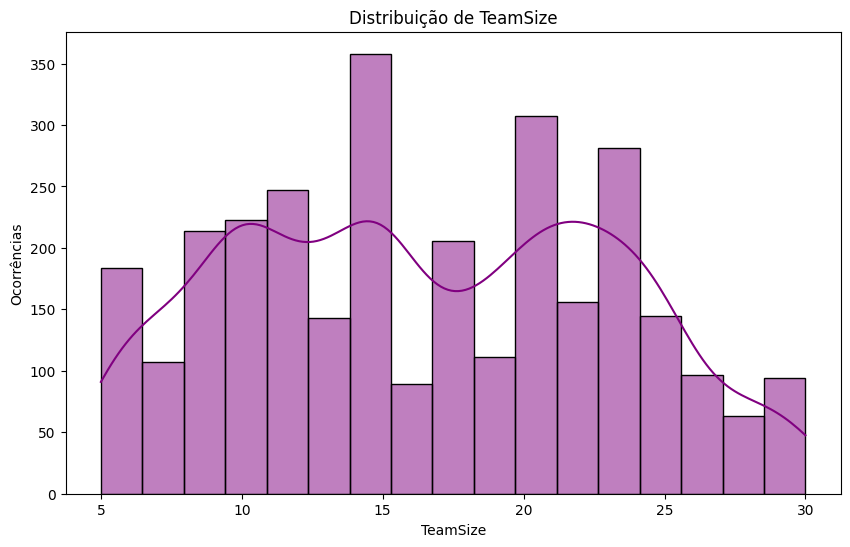

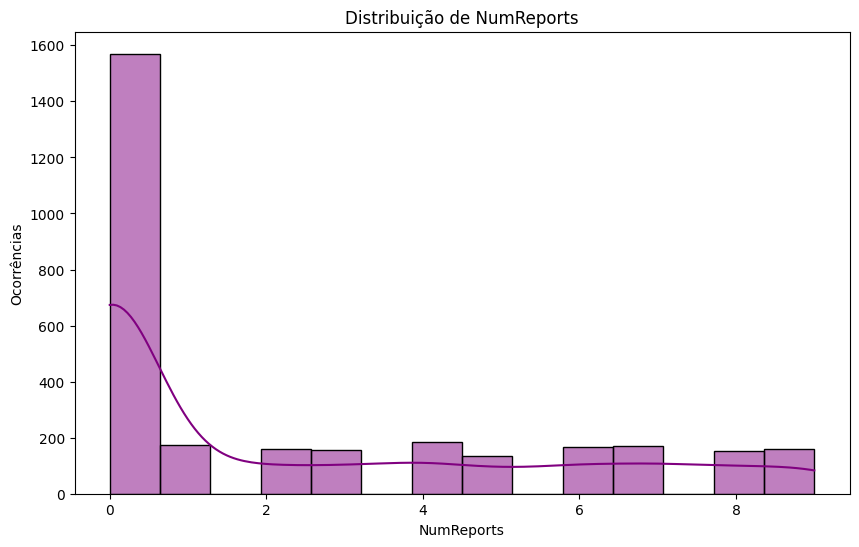

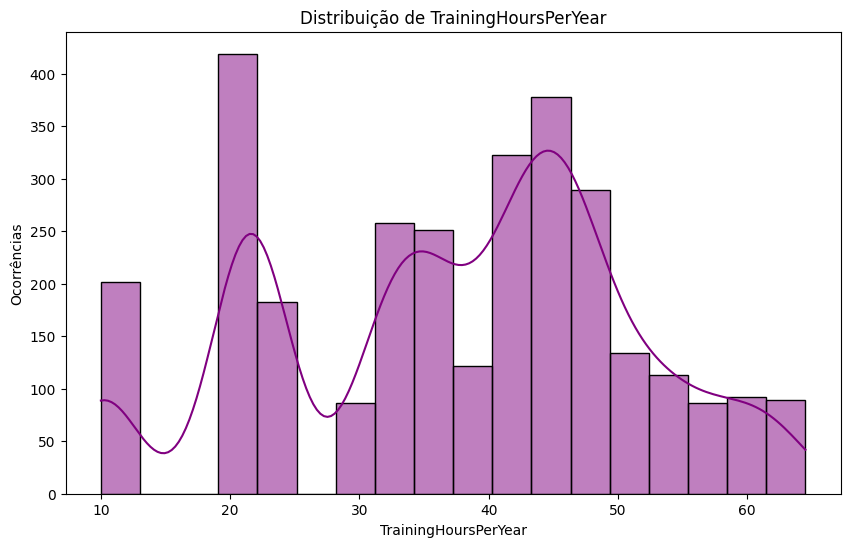

In [15]:
## Quero verificar a distribuição de todas as variaveis númericas, int64 ou float64, presentes no dicionário

variaveis_numericas=['Age', 'Experience', 'WLB', 'WorkEnv', 'PhysicalActivityHours', 'SleepHours', 'CommuteDistance', 'NumCompanies', 'TeamSize', 'NumReports', 'TrainingHoursPerYear']
for num in variaveis_numericas:
    plt.figure(figsize=(10,6))
    sns.histplot(data=base, x= num , kde= True, color="Purple")
    plt.title(f'Distribuição de {num}')
    plt.xlabel(num)
    plt.ylabel('Ocorrências')
    plt.show()


<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


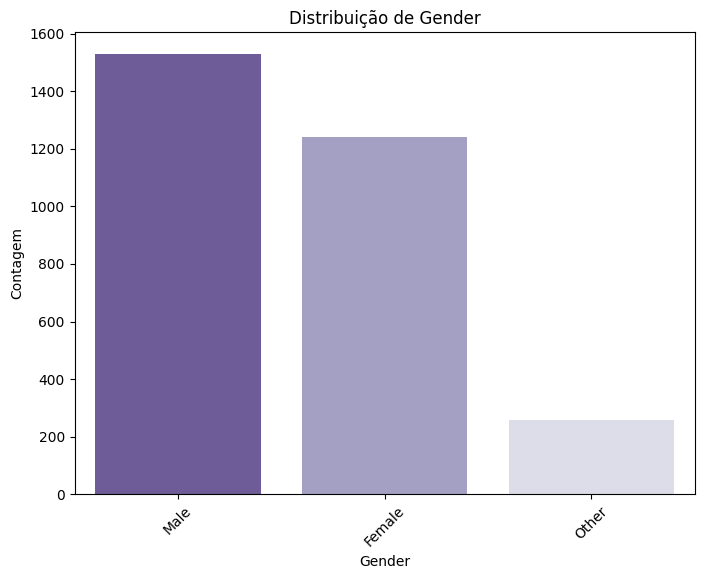

<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


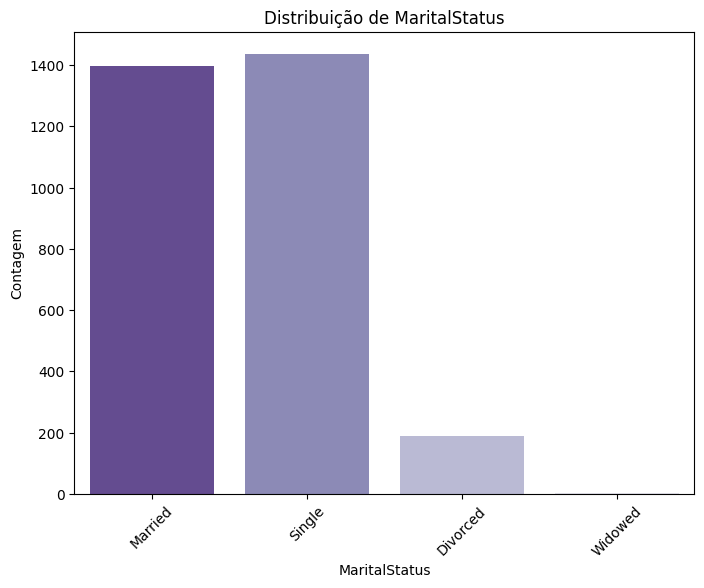

<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


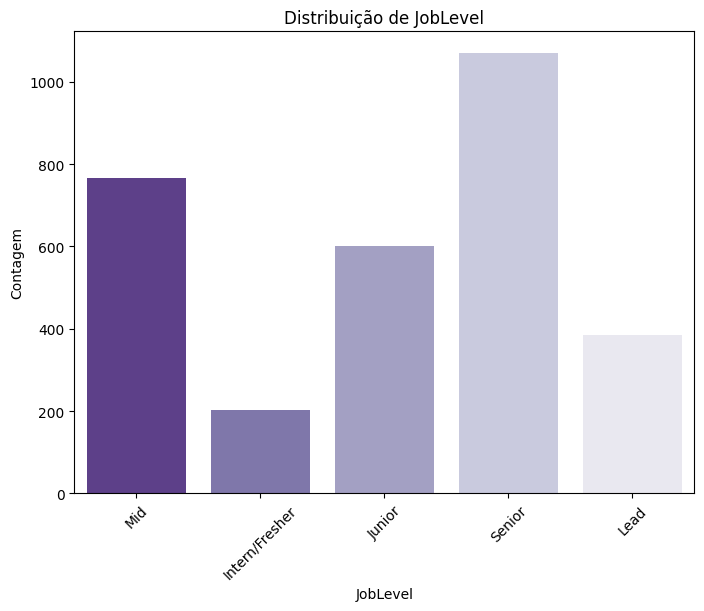

<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


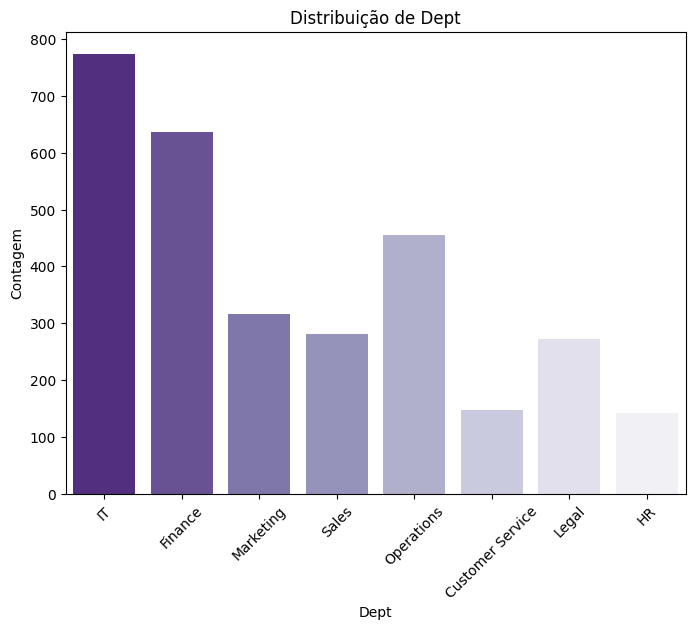

<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


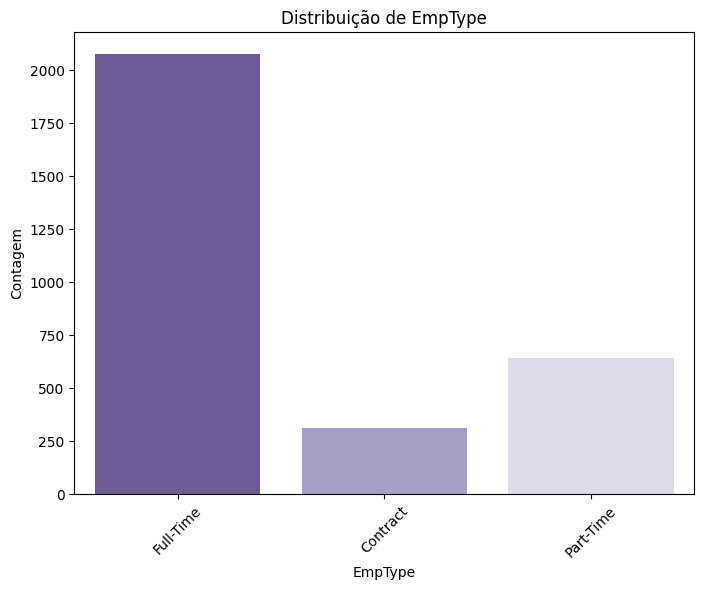

<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


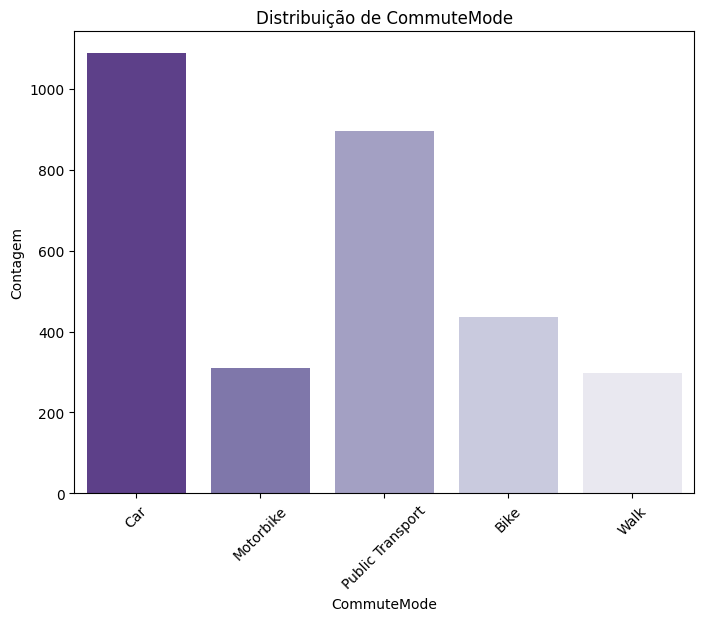

<ipython-input-17-2306448068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=feature, palette='Purples_r')


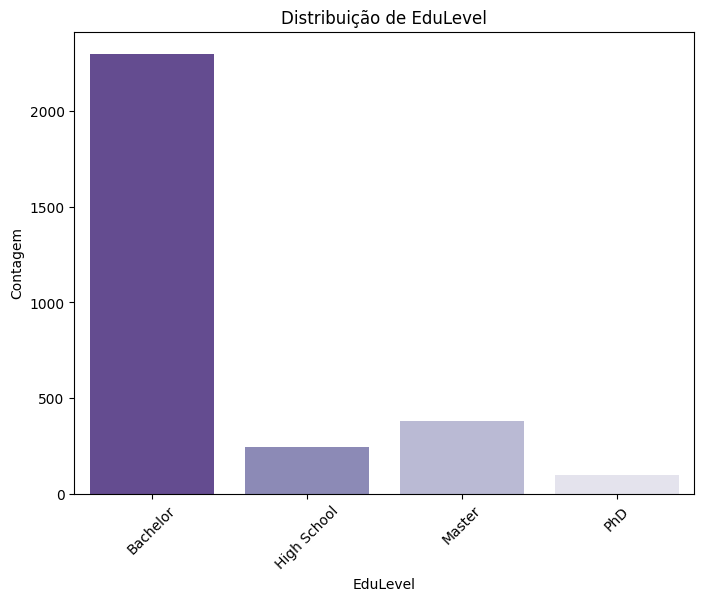

In [17]:
variaveis_cat = ['Gender', 'MaritalStatus', 'JobLevel', 'Dept', 'EmpType', 'CommuteMode', 'EduLevel']
for feature in variaveis_cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=base, x=feature, palette='Purples_r')
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()


## Conclusões Iniciais:

1. Nota-se que variáveis que a maior parte da população da pesquisa possui pouca ou nenhuma experência prévia e consequentemente não trabalharam em nenhuma empresa anteriormente, logo há um ponto de atenção aqui, pois se jovens em seu primeiro emprego se sentirem desiludidos com a experiência do ambiente de trabalho, há uma maior chance rage applying por exemplo.Além disso, esses empregados possuem idade menor do que 25 anos, isso se alinha com a problemática citada na introdução, a maior parte das demissões é feita por pessoas das gerações z e millenial. Logo, os modelos e a análise devem priorizar estes grupos.

2. A curva de distribuição de horas de sono apresenta comportamento normal, possivelmente este fator não possui grande relevância na tomada de decisão do pedido de demissão. O mesmo ocorre para horas de atividade física. No entanto, ainda é importante verificar gráficos de boxplot para checar extremos já que uma distribuição normal pode não sempre ser conclusiva.

3. A curva de distribuição de horas de treinamento é incomum, com multiplos picos espaçados, cabe aqui relacionar as horas de treinamento com features como idade e nível de estresse, para verificar o perfil de quem realiza mais e menos treinamentos na jornada de trabalho.

4. O tamanho das equipes possuem valores variados, cabe analisar se equipes maiores possuem maior ou menor taxa de satisfação, além de buscar relações entre a variável de estresse por exemplo.

5. A taxa de aprovação do trabalho possuem um bom valor, com a maior parte das ocorrências sendo de notas 4 e 5. É necessário avaliar se as notas abaixo de 3 são compostas por pessoas mais jovens e verificar combinações com experiência, setor e carga de trabalho.

6. Nota-se que setores como IT e Finanças possuem maior número de funcionários, a checagem de satisfação relacionada com setor pode trazer insights.


<ipython-input-18-3102419688>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=base, x='JobSatisfaction', y='Age', palette='Purples')


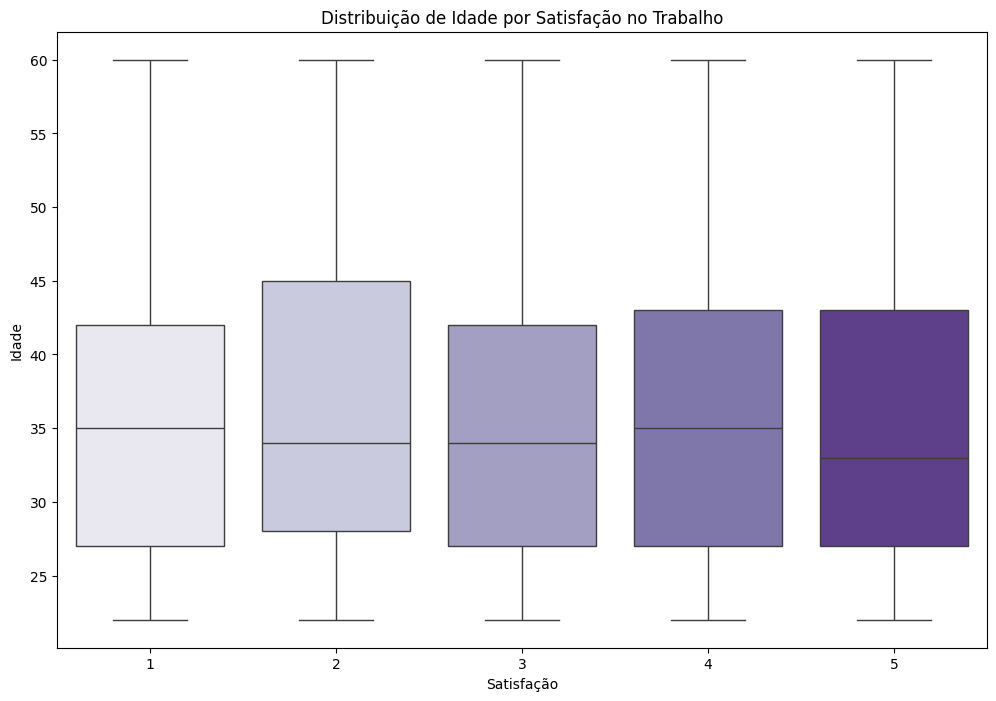

In [18]:
## Quero verificar aqui se pessoas mais jovens dão menor nota de satisfação
plt.figure(figsize=(12, 8))
sns.boxplot(data=base, x='JobSatisfaction', y='Age', palette='Purples')
plt.title('Distribuição de Idade por Satisfação no Trabalho')
plt.xlabel('Satisfação')
plt.ylabel('Idade')
plt.show()



Nota-se pouca diferença das distribuições de de boxplots, com exceção da da nota 5, que possui mediana menor em comparação com os menores valores.


<ipython-input-35-1006893566>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=base, x='Stress', y='TrainingHoursPerYear', palette='Purples')


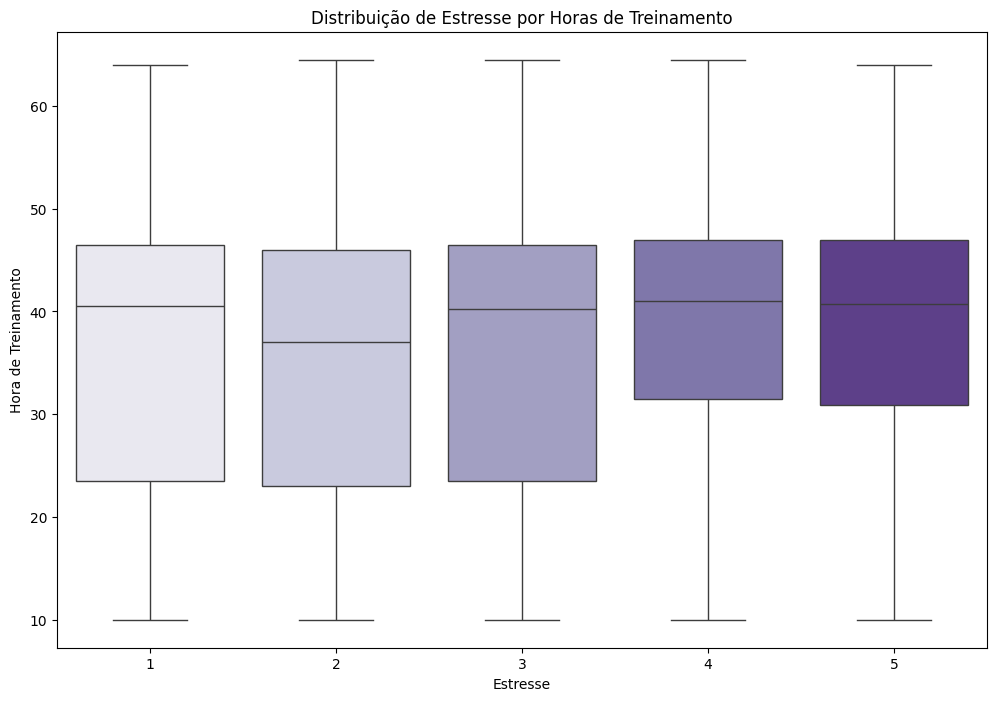

In [35]:
## Quero verificar aqui se pessoas com mais treinamento são mais estressadas
plt.figure(figsize=(12, 8))
sns.boxplot(data=base, x='Stress', y='TrainingHoursPerYear', palette='Purples')
plt.title('Distribuição de Estresse por Horas de Treinamento')
plt.xlabel('Estresse')
plt.ylabel('Hora de Treinamento')
plt.show()

Não há correlacionamento de estresse e horas de treinamento

<ipython-input-36-2961506646>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=base, x='Stress', y='SleepHours', palette='Purples')


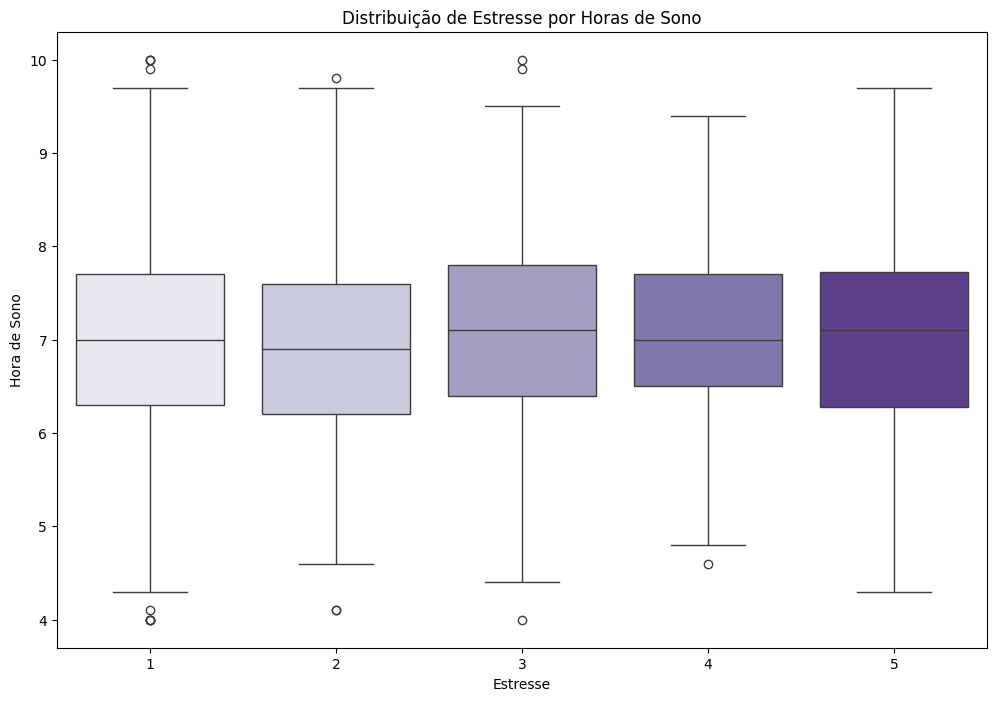

In [36]:
## Quero verificar aqui se pessoas com menos horas de sono são mais estressadas
plt.figure(figsize=(12, 8))
sns.boxplot(data=base, x='Stress', y='SleepHours', palette='Purples')
plt.title('Distribuição de Estresse por Horas de Sono')
plt.xlabel('Estresse')
plt.ylabel('Hora de Sono')
plt.show()

Também não há correlação clara entre horas de sono e estresse, a distribuição segue com medianas praticamente iguais.

<Figure size 1200x800 with 0 Axes>

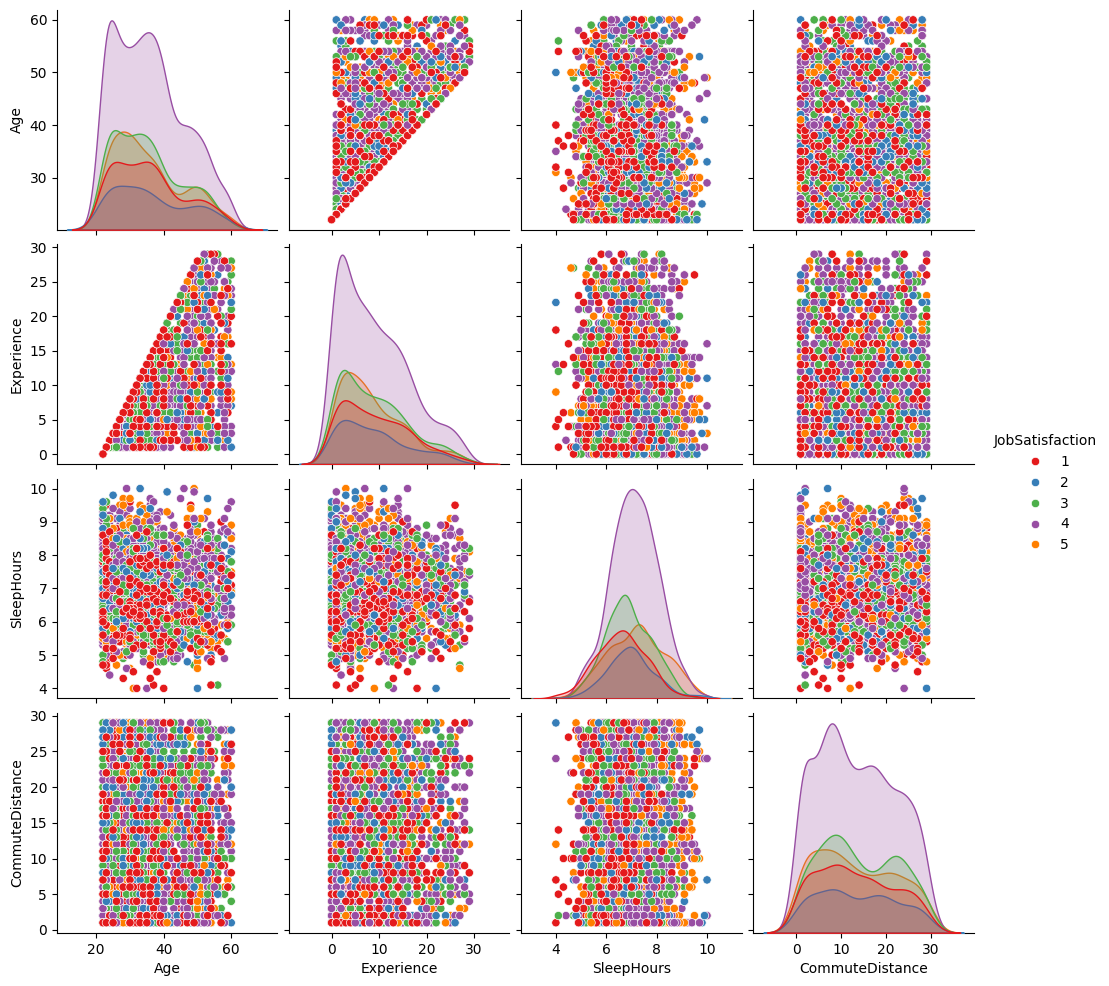

In [29]:
##Quero verificar padrões de comportamento através dos clusters naturais qualitativamente
plt.figure(figsize=(12, 8))
sns.pairplot(base[['Age', 'Experience', 'SleepHours', 'CommuteDistance', 'JobSatisfaction']], hue='JobSatisfaction', palette='Set1')
plt.show()

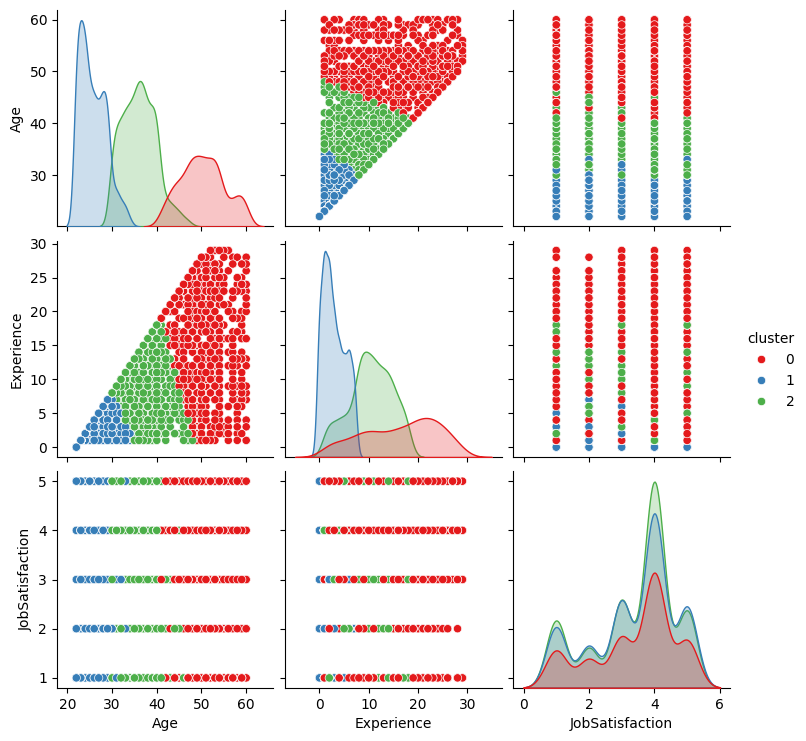

In [28]:
##Agora quero verificar padrões de comportamento através dos clusters naturais quantitativamente
kmeans = KMeans(n_clusters=3, random_state=42)
base['cluster'] = kmeans.fit_predict(base[['Age', 'Experience', 'JobSatisfaction']])


sns.pairplot(base[['Age', 'Experience', 'JobSatisfaction', 'cluster']], hue='cluster', palette='Set1')
plt.show()

## Conclusão Qualitativa:

1. Baixa satisfação está amplamente distribuída
2. Há baixa correlação entre horas de sono e idade, experiência ou distância de deslocamento
3. Também não há correlação entre Satisfação e Distância de deslocamento

## Conclusão Quantitativa:
1. Há três picos distintos para Age, um para cada cluster, o que mostra que a clusterização segmentou bem os grupos por faixa etária.
2. O mesmo ocorre para Experience.
3. Em JobSatisfaction todos os clusters possuem representação em quase todas as faixas, indicando que a satisfação é multifatorial e depende de mais do que apenas idade e experiência.

---

É necessário portanto cruzar a variável JobSatisfaction com outras variáveis como estresse e horas de treinamento





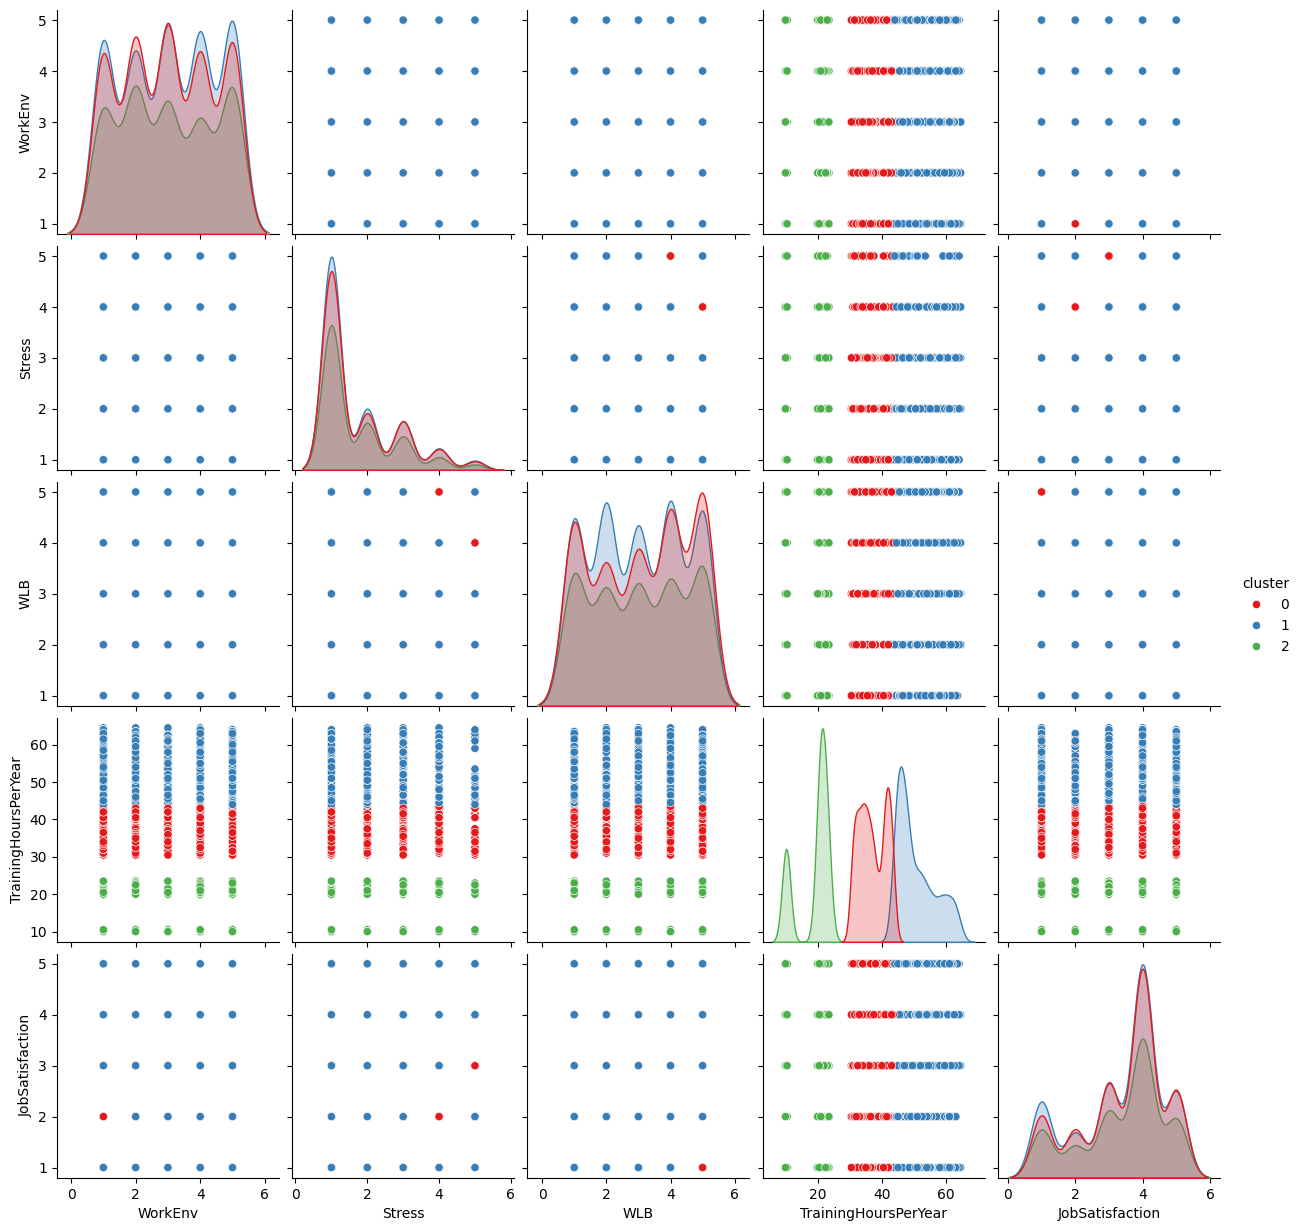

In [30]:
##Quero avaliar os valores mais psicológicos
kmeans = KMeans(n_clusters=3, random_state=42)
base['cluster'] = kmeans.fit_predict(base[['WorkEnv', 'Stress', 'WLB', 'TrainingHoursPerYear','JobSatisfaction']])


sns.pairplot(base[['WorkEnv', 'Stress', 'WLB', 'TrainingHoursPerYear','JobSatisfaction', 'cluster']], hue='cluster', palette='Set1')
plt.show()

##Conclusões das Variáveis Psicológicas:

1. O **Grupo 0** indica o grupo com maior de churn pois possui baixa satisfação, muito estresse e baixo WLB, mesmo que receba muitos treinamentos. O **Grupo 1** é inteiramente médio, satisfação média, estresse moderado e horas de treinamento médias também. Por fim, o **Grupo 2** seria o grupo ideal, boa satisfação, baixo estresse, horas moderadas e bom WLB






##Modelos

In [42]:
##irei converter variáveis string categórias para valores binários
from sklearn.preprocessing import LabelEncoder

categorical_cols = base.select_dtypes(include='object').columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    base[col] = label_encoder.fit_transform(base[col])


In [40]:
## A partir daqui quero criar uma variável de risco de Churn baseado nos grupos citados anteriormente e através de regras que defini

base['ChurnRisk_cluster'] = base['cluster'].apply(lambda x: 1 if x == 0 else 0)


base['ChurnRisk_regra'] = (
    (base['JobSatisfaction'] <= 2) |
    ((base['Stress'] >= 4) & (base['WLB'] <= 2)) |
    ((base['Experience'] == 0) & (base['JobLevel'] == 'Júnior'))
).astype(int)




In [55]:
##Irei selecionar apenas variaveis que considero relevantes
var_relevante = [
    'JobSatisfaction', 'Stress', 'WLB', 'Experience', 'Workload', 'WorkEnv',
    'TrainingHoursPerYear', 'SleepHours', 'NumCompanies', 'TeamSize',
    'NumReports', 'haveOT'
]


In [56]:
X = base[var_relevante]
y = base['ChurnRisk_cluster']

In [58]:
##escolhi 3 modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [59]:
def rodar_modelo(y_col):
    print(f"\n### Avaliando target: {y_col} ###")
    X = base[var_relevante]
    y = base[y_col]

    # Dividir treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for nome_modelo, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        print(f"\nModelo: {nome_modelo}")
        print(classification_report(y_test, y_pred))

In [60]:
# Testar para clusters
rodar_modelo('ChurnRisk_cluster')

# Testar para regras manuais
rodar_modelo('ChurnRisk_regra')


### Avaliando target: ChurnRisk_cluster ###

Modelo: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       322

    accuracy                           1.00       908
   macro avg       1.00      1.00      1.00       908
weighted avg       1.00      1.00      1.00       908


Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       586
           1       0.69      0.51      0.59       322

    accuracy                           0.75       908
   macro avg       0.73      0.69      0.70       908
weighted avg       0.74      0.75      0.74       908



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Modelo: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       322

    accuracy                           1.00       908
   macro avg       1.00      1.00      1.00       908
weighted avg       1.00      1.00      1.00       908


### Avaliando target: ChurnRisk_regra ###

Modelo: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       668
           1       1.00      1.00      1.00       240

    accuracy                           1.00       908
   macro avg       1.00      1.00      1.00       908
weighted avg       1.00      1.00      1.00       908


Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       668
           1       1.00      0.94      0.97       240

    accuracy                           0.98       908
   macro avg    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Interpretação dos modelos:
1 = Alta chance de Churn de acordo com as regras e cluster que escolhi
|| 0 = Chance Baixa/Média, demais grupos e regras

1. Random Forest e XGBoost estão classificando com 100% de acurácia nos dois targets, o que pode indicar que os dados são muito "fáceis" para esses modelos.

2. Logistic Regression tem resultados razoáveis para o ChurnRisk_cluster, mas menos perfeita (F1 ~ 0.7 para classe 1). Isso mostra que a separação não é totalmente linear, mas ainda significativa. No target ChurnRisk_regra ela vai melhor (F1 próximo de 0.97).

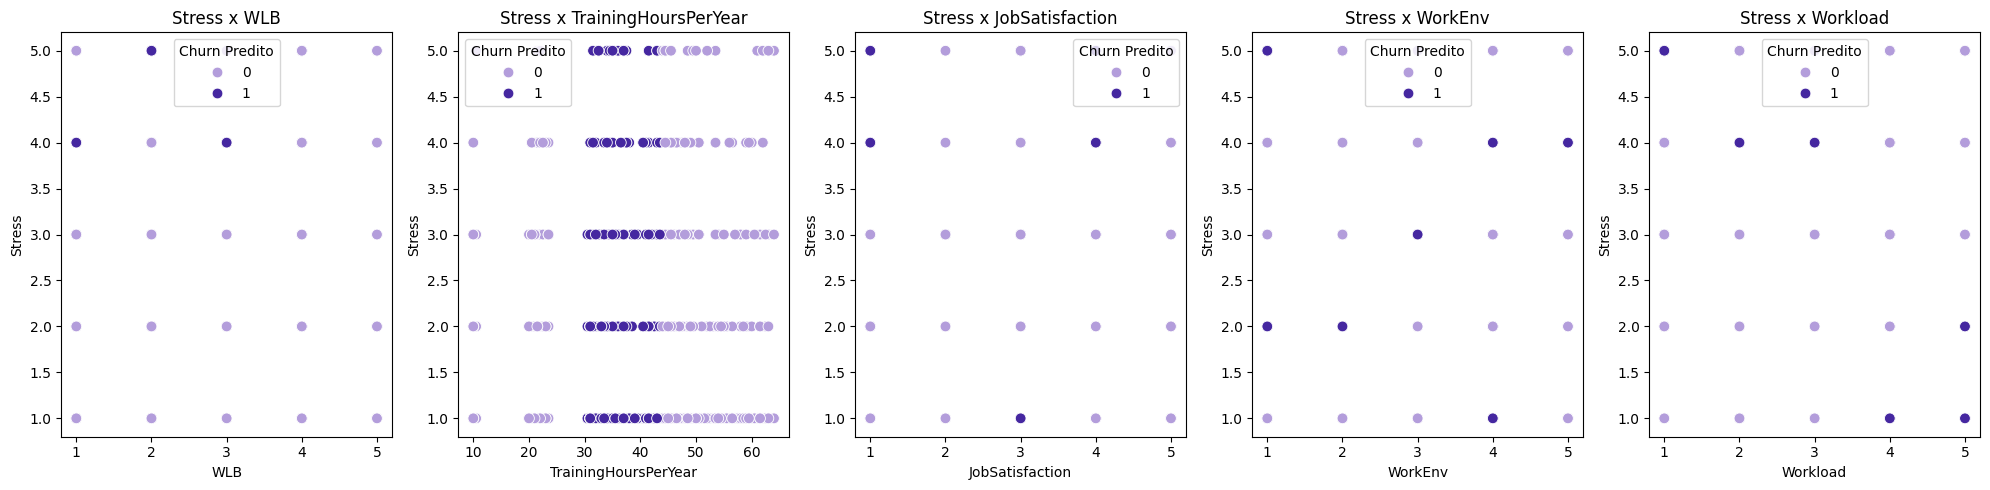

In [65]:
#Apliquei o modelo em um Scatterplot para verificar todas as possibilidades relacionando-as com nível de estresse


vars_to_plot = ['WLB', 'TrainingHoursPerYear', 'JobSatisfaction', 'WorkEnv', 'Workload']


df_plot = base.loc[X_test.index, vars_to_plot + ['Stress']].copy()
df_plot['Predicted'] = y_pred


palette = {0: '#b39ddb', 1: '#4527a0'}  # roxo claro = sem churn | roxo escuro = com churn

fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(20, 5))

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.scatterplot(data=df_plot, x=var, y='Stress', hue='Predicted', palette=palette, s=60, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Stress')
    ax.legend(title='Churn Predito')
    ax.set_title(f'Stress x {var}')

plt.tight_layout()
plt.show()


##Conclusão

O modelo de previsão de churn, que classifica os colaboradores com maior risco (valor 1) baseado em variáveis como estresse, equilíbrio trabalho-vida (WLB), satisfação no trabalho e horas de treinamento, apresentou alta capacidade de identificar grupos vulneráveis à rotatividade.

Essa segmentação nos permite conectar o risco de churn com comportamentos emergentes no ambiente de trabalho:

Quiet Quitting: colaboradores com baixa satisfação e equilíbrio trabalho-vida ruim, mas que ainda permanecem no emprego, possivelmente realizando apenas o mínimo necessário, indicados pelos grupos de risco do modelo.

Rage Applying: colaboradores estressados e insatisfeitos podem buscar ativamente outras oportunidades, aumentando o risco de saída, comportamento previsto pelo modelo em grupos com alto estresse e baixa satisfação.

Revenge Quitting: o abandono motivado por frustrações acumuladas, possivelmente sinalizado por baixos índices de WLB e alta carga de trabalho, características também captadas pelo modelo.

Portanto, a variável ChurnRisk_cluster = 1 identifica colaboradores que apresentam características compatíveis com esses comportamentos prejudiciais à empresa, oferecendo uma ferramenta valiosa para ações preventivas de retenção, como intervenções focadas em melhorar a satisfação, reduzir o estresse e promover o equilíbrio trabalho-vida.

